In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('2007-2021武汉二手房均价.csv')

In [6]:
df.head()

,Time,Price.per.square.meter
0,2021/8/1,16843
1,2021/7/1,17029
2,2021/6/1,17616
3,2021/5/1,16977
4,2021/4/1,16920


In [7]:
type(df['Time'])

pandas.core.series.Series

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Time                    165 non-null    object
 1   Price.per.square.meter  165 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


In [9]:
df['Time'] = pd.to_datetime(df['Time'],format='%Y.%m.%d')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Time                    165 non-null    datetime64[ns]
 1   Price.per.square.meter  165 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.7 KB


In [11]:
df.sort_values(by='Time',ascending=True,inplace=True)
df.head()

,Time,Price.per.square.meter
164,2007-10-01,4883
163,2007-11-01,5324
162,2007-12-01,5479
161,2008-01-01,5606
160,2008-04-01,5488


In [12]:
#caculate Sequential growth rate# #计算环比增长#
df['On_month_basis']=''
for i in range(0,len(df)):
    if i == 0:
        df['On_month_basis'][i] = 'null'
    else:
        df['On_month_basis'][i] = format((df['Price.per.square.meter'][i] - df['Price.per.square.meter'][i-1])/df['Price.per.square.meter'][i-1],'.2%')

In [13]:
df.head()

,Time,Price.per.square.meter,On_month_basis
164,2007-10-01,4883,-8.28%
163,2007-11-01,5324,-2.83%
162,2007-12-01,5479,-2.27%
161,2008-01-01,5606,2.15%
160,2008-04-01,5488,5.30%


In [14]:
#caculate the year-on-year growth rate#  #计算同比增长率#
df['On_year_basis']=''
df['On_year_basis'] = df['Price.per.square.meter'].pct_change(periods=12)

In [15]:
df.head(15)

,Time,Price.per.square.meter,On_month_basis,On_year_basis
164,2007-10-01,4883,-8.28%,NaN
163,2007-11-01,5324,-2.83%,NaN
162,2007-12-01,5479,-2.27%,NaN
161,2008-01-01,5606,2.15%,NaN
160,2008-04-01,5488,5.30%,NaN
159,2008-05-01,5212,-1.94%,NaN
158,2008-06-01,5315,0.32%,NaN
157,2008-07-01,5298,-1.82%,NaN
156,2008-08-01,5396,2.98%,NaN
155,2008-09-01,5240,0.10%,NaN


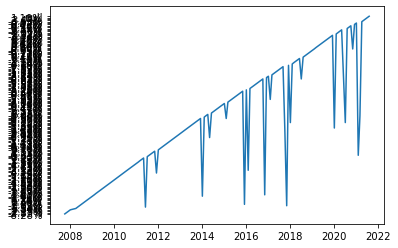

In [16]:
plt.plot(df['Time'],df['On_month_basis']) 
plt.show()

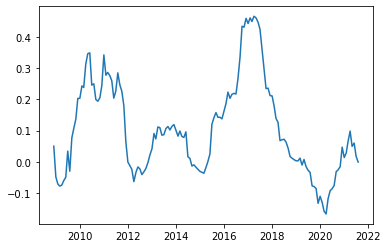

In [17]:
plt.plot(df['Time'],df['On_year_basis'])
plt.show()

<Figure size 1800x576 with 0 Axes>

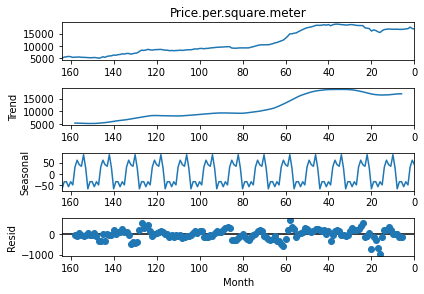

In [22]:
#check seasonality and trending
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df['Price.per.square.meter'],freq = 12)
fig = plt.figure(figsize=(25,8))
res.plot()
plt.xlabel('Month')
plt.show()

### results:有季节性，上半年比下半年价格高；趋势：前60个月缓慢上升，从60个月后迅速上升，保持平稳。

In [23]:
plt.save('reset.jpg')

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [18]:
#check white noise
from statsmodels.sandbox.stats.diagnostic import acorr_ljungbox
LBQ = acorr_ljungbox(df['Price.per.square.meter'])
LBQ

(array([ 164.27279402,  325.67225393,  483.72532563,  638.49554874,
         789.71252875,  937.1149542 , 1080.54517186, 1219.74533016,
        1354.67133434, 1485.10959771, 1610.98233097, 1732.1312237 ,
        1848.39805002, 1959.73533521, 2066.24057014, 2168.11017457,
        2265.50608746, 2358.22862501, 2446.19644984, 2529.57067765,
        2608.52773894, 2682.9297646 , 2752.8070128 , 2818.20254552,
        2879.07316142, 2935.50846802, 2987.79926072, 3036.1044252 ,
        3080.58978079, 3121.32890439, 3158.56782096, 3192.51706984,
        3223.25191231, 3250.94502934, 3275.75788388, 3297.84453148,
        3317.46511551, 3334.88761234, 3350.25362974, 3363.77389176]),
 array([1.31876858e-037, 1.91059486e-071, 1.60514651e-104, 7.21006784e-137,
        1.94434961e-168, 3.55158927e-199, 4.72676336e-229, 5.19243672e-258,
        4.80035682e-286, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.0000

In [19]:
df_LBQ = pd.DataFrame(LBQ[1])
df_LBQ.head()

,0
0,1.318769e-37
1,1.910595e-71
2,1.605147e-104
3,7.210068e-137
4,1.944350e-168


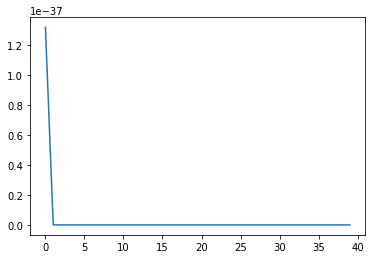

In [20]:
plt.plot(df_LBQ)  # 从图可以看出，p值都小于0.5，是非白噪声序列

In [21]:
import statsmodels.graphics.tsaplots as tsplot
fig2=plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

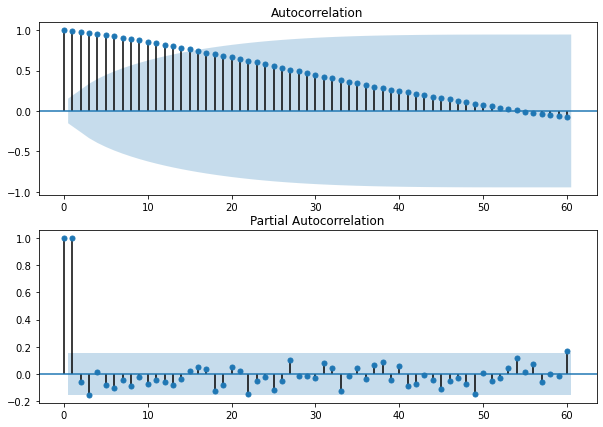

In [22]:
ax1=fig2.add_subplot(211)
tsplot.plot_acf(df['Price.per.square.meter'],lags=60,ax=ax1)
ax2=fig2.add_subplot(212)
tsplot.plot_pacf(df['Price.per.square.meter'],lags=60,ax=ax2)

In [23]:
# check stationarity
from statsmodels.tsa.stattools import adfuller
adfuller(df['Price.per.square.meter'])

(-0.7844954107770421,
 0.8236340530856945,
 3,
 161,
 {'1%': -3.471633386932248,
  '5%': -2.8796651107461972,
  '10%': -2.576433647235832},
 2088.8001045955198)

### results: P值0.823634，大于0.5，非平稳序列；ACF截尾，PACF拖尾：使用MA模型，也就意味着RAMA模型AR模型中的P值或为0

In [24]:
#一阶差分使平滑
df_diff = df['Price.per.square.meter'].diff().dropna()
df_diff.head()

163    441.0
162    155.0
161    127.0
160   -118.0
159   -276.0
Name: Price.per.square.meter, dtype: float64

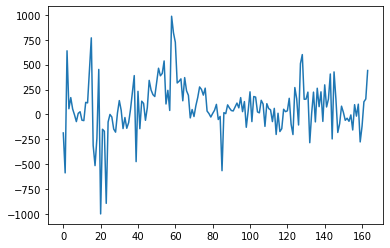

In [25]:
plt.plot(df_diff)

In [26]:
#再次坚持差分后的数据的平稳性
adfuller(df_diff)

(-4.59715344327207,
 0.0001307391562972381,
 2,
 161,
 {'1%': -3.471633386932248,
  '5%': -2.8796651107461972,
  '10%': -2.576433647235832},
 2075.369129572006)

In [27]:
fig3=plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

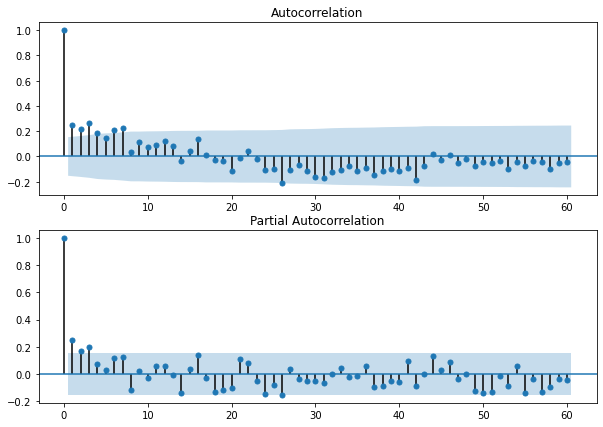

In [28]:
ax11=fig3.add_subplot(211)
tsplot.plot_acf(df_diff,lags=60,ax=ax11)
ax21=fig3.add_subplot(212)
tsplot.plot_pacf(df_diff,lags=60,ax=ax21)

### results: 通过一阶差分后已经变成了平稳序列，所以d=1

In [29]:
#建模,选择参数
from statsmodels.tsa.stattools import arma_order_select_ic
order = arma_order_select_ic(df_diff)
order
#p=1.q=1

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


{'bic':              0            1            2
 0  2299.503654  2296.630982  2298.815300
 1  2294.093043  2286.992116  2291.932208
 2  2294.082261  2291.955247  2293.024246
 3  2292.745028  2296.474017  2300.341036
 4  2297.238602  2301.238832  2306.321431,
 'bic_min_order': (1, 1)}

### 建模参数为：p=1.q=1

In [30]:
from statsmodels.tsa.arima_model import ARIMA
model_1 = ARIMA(df['Price.per.square.meter'],order=(1,1,1)).fit()
model_1.summary()
#这个模型P值大于0.5

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D.Price.per.square.meter   No. Observations:                  164
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -1133.296
Method:                             css-mle   S.D. of innovations            242.398
Date:                      Sun, 29 Aug 2021   AIC                           2274.593
Time:                              21:24:24   BIC                           2286.992
Sample:                                   1   HQIC                          2279.626
                                                                                    
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             70.8693     48.287      1.468      0.142     -23.772     165.511
ar.L1.D.Price.per.square.meter     0.8976      0.061     14.649      0.000       0.778       1.018
ma.L1.D.Price.per.square.meter    -0.7295      0.094     -7.801      0.000      -0.913      -0.546
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1141           +0.0000j            1.1141            0.0000
MA.1            1.3708           +0.0000j            1.3708            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
model_2= ARIMA(df['Price.per.square.meter'],order=(0,1,1)).fit()
model_2.summary

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<bound method ARMAResults.summary of <statsmodels.tsa.arima_model.ARIMAResults object at 0x0000010E2862C4C0>>

In [32]:
#预测
df_prediction = model_2.forecast(steps=6)
df_prediction

(array([16895.21215861, 16968.43826722, 17041.66437583, 17114.89048444,
        17188.11659305, 17261.34270166]),
 array([253.71674003, 395.88101503, 499.07050799, 584.3123872 ,
        658.61260216, 725.34140486]),
 array([[16397.93648587, 17392.48783135],
        [16192.52573561, 17744.35079884],
        [16063.50415443, 18019.82459724],
        [15969.65924981, 18260.12171907],
        [15897.25961306, 18478.97357304],
        [15839.69967164, 18682.98573169]]))

In [33]:
df_all = df['Price.per.square.meter'].append(pd.DataFrame(df_prediction[0]))
df_all.head()

,0
164,4883.0
163,5324.0
162,5479.0
161,5606.0
160,5488.0


In [34]:
df_all.tail()

,0
1,16968.438267
2,17041.664376
3,17114.890484
4,17188.116593
5,17261.342702


In [35]:
df_all=df['Price.per.square.meter'].reset_index()
df_all=df_all['Price.per.square.meter']
df_all=df_all.append(pd.DataFrame(df_prediction[0]))
df_all.reset_index(inplace=True)
df_all=df_all.iloc[:,1]
df_all.tail()

166    16968.438267
167    17041.664376
168    17114.890484
169    17188.116593
170    17261.342702
Name: 0, dtype: float64

In [36]:
df.reset_index(inplace=True)
df.head()

,index,Time,Price.per.square.meter,On_month_basis,On_year_basis
0,164,2007-10-01,4883,-8.28%,NaN
1,163,2007-11-01,5324,-2.83%,NaN
2,162,2007-12-01,5479,-2.27%,NaN
3,161,2008-01-01,5606,2.15%,NaN
4,160,2008-04-01,5488,5.30%,NaN


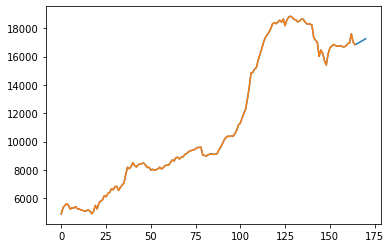

In [37]:
plt.plot(df_all)
plt.plot(df['Price.per.square.meter'])

In [38]:
df_all.to_csv('C:\Python\Practice5001\df_all001.csv')

In [39]:
df.to_csv('C:\Python\Practice5001\df001.csv')